In [1]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
from skimage.segmentation import mark_boundaries
import scipy.ndimage as snm

In [2]:
img_idx = 1
sl = 18
img = r'./test_superpixels/sp_1_2.nii.gz'
original = r'/shared/home/v_abhinand_jha/Code/SSLv1/data/CHAOST2/chaos_MR_T2_normalized/image_10.nii.gz'
sp = './test_superpixels/sp_1_1.nii.gz'
sp2 = './test_superpixels/sp_1_3.nii.gz'
# sp = '/shared/home/v_abhinand_jha/Code/Self-supervised-Fewshot-Medical-Image-Segmentation/data/CHAOST2/chaos_MR_T2_normalized/superpix-MIDDLE_1.nii.gz'
original_spix = r'/shared/home/v_abhinand_jha/Code/Self-supervised-Fewshot-Medical-Image-Segmentation/data/CHAOST2/chaos_MR_T2_normalized/superpix-MIDDLE_1.nii.gz'


test_image=nib.load(img).get_fdata()
test_sp=nib.load(sp).get_fdata()
test_sp2=nib.load(sp2).get_fdata()
orig=nib.load(original).get_fdata()
orig_spix = nib.load(original_spix).get_fdata()

FileNotFoundError: No such file or no access: './test_superpixels/sp_1_2.nii.gz'

In [102]:
test_sp2 = test_sp

In [103]:
orig.shape

(143, 223, 36)

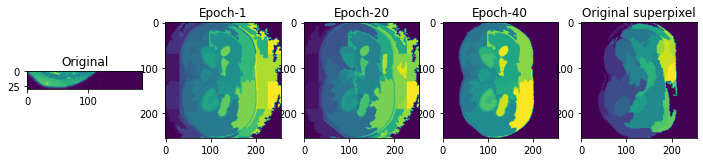

In [104]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5, figsize = (12, 6))
# t = test_image[:,:,sl]
orig = orig[113:369,33:289,:]
# mask = np.float32(t > thresh)
ax1.imshow(orig[:,:,18])
ax1.set_title('Original')
ax2.imshow(test_image[18,...]) # Cropping to 256x256
ax2.set_title('Epoch-1')
# print(np.unique(test_sp))
# print(np.unique(test_image[...,sl]))

ax3.imshow(test_sp[18,...])
# ax4.imshow(orig[:,:,18]*test_sp2[18,...])
ax4.imshow(out_seg)
ax5.imshow(orig_spix[...,18])
ax5.set_title('Original superpixel')
ax3.set_title('Epoch-20')
ax4.set_title('Epoch-40')
plt.show()

In [60]:
import SimpleITK as sitk
img_fid = r'/shared/home/v_abhinand_jha/Code/Self-supervised-Fewshot-Medical-Image-Segmentation/data/CHAOST2/chaos_MR_T2_normalized/image_10.nii.gz'
j = r'/shared/home/v_abhinand_jha/Code/SSLv1/data/CHAOST2/chaos_MR_T2_normalized/image_10.nii.gz'
im_obj = sitk.ReadImage(img_fid)
i = sitk.GetArrayFromImage(im_obj)
im_obj1 = sitk.ReadImage(j)
j = sitk.GetArrayFromImage(im_obj1)

In [63]:
np.unique(np.unique(i[0]) == np.unique(j[0]) )

array([ True])

In [96]:
from skimage.measure import label
def fg_mask2d(img_2d, thresh): # change this by your need
        mask_map = np.float32(img_2d > thresh)
        
        def getLargestCC(segmentation): # largest connected components
            labels = label(segmentation)
            assert( labels.max() != 0 ) # assume at least 1 CC
            largestCC = labels == np.argmax(np.bincount(labels.flat)[1:])+1
            return largestCC
        if mask_map.max() < 0.999:
            return mask_map
        else:
            post_mask = getLargestCC(mask_map)
            fill_mask = snm.binary_fill_holes(post_mask)
        return fill_mask

# remove superpixels within the empty regions
def superpix_masking(raw_seg2d, mask2d):
    raw_seg2d = np.int32(raw_seg2d)
    lbvs = np.unique(raw_seg2d)
    max_lb = lbvs.max()
    raw_seg2d[raw_seg2d == 0] = max_lb + 1
    lbvs = list(lbvs)
    lbvs.append( max_lb )
    raw_seg2d = raw_seg2d * mask2d
    lb_new = 1
    out_seg2d = np.zeros(raw_seg2d.shape)
    for lbv in lbvs:
        if lbv == 0:
            continue
        else:
            out_seg2d[raw_seg2d == lbv] = lb_new
            lb_new += 1
    
    return out_seg2d

fgm_id = r'/shared/home/v_abhinand_jha/Code/SSLv1/data/CHAOST2/chaos_MR_T2_normalized/fgmask_10.nii.gz'
_fgm = 
out_seg = superpix_masking(test_image[18,...],_fgm)



In [101]:
out_seg.max()

39.0

Text(0.5, 1.0, 'Original-Superpixel')

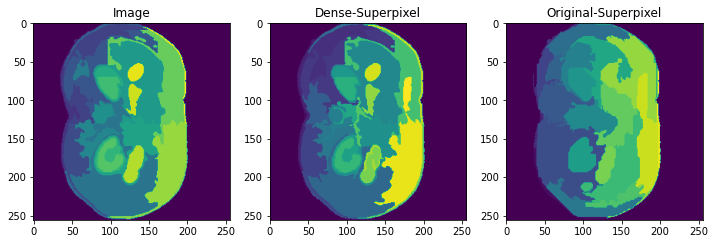

In [38]:
sp_dense = './test_superpixels/sp_1_1.nii.gz'
sp_orig = '/shared/home/v_abhinand_jha/Code/Self-supervised-Fewshot-Medical-Image-Segmentation/data/CHAOST2/chaos_MR_T2_normalized/superpix-MIDDLE_10.nii.gz'
# img = '/shared/home/v_abhinand_jha/Code/SSLv1/data/CHAOST2/chaos_MR_T2_normalized/image_10.nii.gz'
img = './test_superpixels/sp_1_4.nii.gz'

test_dense =nib.load(sp_dense).get_fdata()
test_orig =nib.load(sp_orig).get_fdata()
test_img =nib.load(img).get_fdata()

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (12, 6))
# t = test_image[:,:,sl]
# test_img = test_img[113:369,33:289,:]
# test_img = test_img[18,...]
# mask = np.float32(t > thresh)
ax1.imshow(test_img[18,...])
ax1.set_title('Image')
ax2.imshow(test_dense[18,...]) # Cropping to 256x256
ax2.set_title('Dense-Superpixel')
ax3.imshow(test_dense[18,...]) # Cropping to 256x256

ax3.imshow(test_orig[...,18]) # Cropping to 256x256
ax3.set_title('Original-Superpixel')

### Visualize preds

Text(0.5, 1.0, 'image')

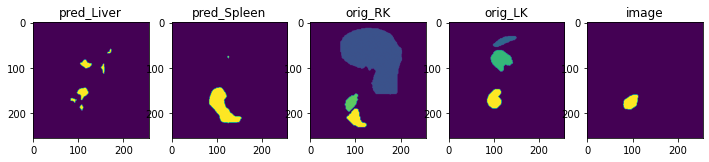

In [25]:
scanId = 1
pred_rk = './data/CHAOST2/chaos_MR_T2_normalized/label_19.nii.gz'
pred_lk = './data/CHAOST2/chaos_MR_T2_normalized/label_38.nii.gz'
# img = '/shared/home/v_abhinand_jha/Code/SSLv1/data/CHAOST2/chaos_MR_T2_normalized/image_10.nii.gz'
orig_pred_rk = './data/CHAOST2/chaos_MR_T2_normalized/label_1.nii.gz'
orig_pred_lk = '/shared/home/v_abhinand_jha/Code/Self-supervised-Fewshot-Medical-Image-Segmentation/data/CHAOST2/chaos_MR_T2_normalized/label_38.nii.gz'
img = '/shared/home/v_abhinand_jha/Code/Self-supervised-Fewshot-Medical-Image-Segmentation/data/CHAOST2/chaos_MR_T2_normalized/label_8.nii.gz'

p_rk =nib.load(pred_rk).get_fdata()
p_lk =nib.load(pred_lk).get_fdata()
o_rk =nib.load(orig_pred_rk).get_fdata()
o_lk =nib.load(orig_pred_lk).get_fdata()
o_img = nib.load(img).get_fdata()

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5, figsize = (12, 6))

ax1.imshow(p_rk[...,2,18])
ax1.set_title('pred_Liver')
ax2.imshow(p_lk[...,3,18]) # Cropping to 256x256
ax2.set_title('pred_Spleen')
ax3.imshow(o_rk[...,28]) # Cropping to 256x256
ax3.set_title('orig_RK')
ax4.imshow(o_lk[...,18]) # Cropping to 256x256
ax4.set_title('orig_LK')
ax5.imshow(np.where(o_img[...,18] == 3, 255, 0)) # Cropping to 256x256
# ax5.imshow(o_img[...,18]) # Cropping to 256x256
ax5.set_title('image')

In [20]:
np.unique(o_img[...,18])

array([0., 1., 4.])

array([0., 1., 2., 3., 4.])

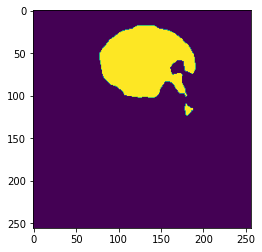

In [38]:

t = './runs/supervised-valid-all__CHAOST2_Superpix_sets_0_1shot/2/interm_preds/scan_19.nii.gz'
tt = nib.load(t).get_fdata()
# plt.imshow(np.where(tt[...,18]==3,255,0))
plt.imshow(np.where(tt[...,18]==1,255,0))
np.unique(tt[...,18])

In [31]:
[0,] + [1]

[0, 1]

### Visualize spixes

Text(0.5, 1.0, 'Original-Superpixel')

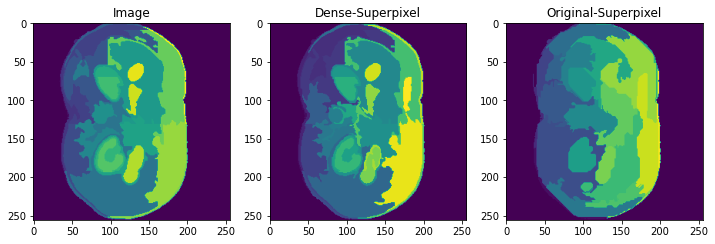

In [32]:
sp_dense = './test_superpixels/sp_1_1.nii.gz'
sp_orig = '/shared/home/v_abhinand_jha/Code/Self-supervised-Fewshot-Medical-Image-Segmentation/data/CHAOST2/chaos_MR_T2_normalized/superpix-MIDDLE_10.nii.gz'
# img = '/shared/home/v_abhinand_jha/Code/SSLv1/data/CHAOST2/chaos_MR_T2_normalized/image_10.nii.gz'
img = './test_superpixels/sp_1_5.nii.gz'

test_dense =nib.load(sp_dense).get_fdata()
test_orig =nib.load(sp_orig).get_fdata()
test_img =nib.load(img).get_fdata()

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (12, 6))
# t = test_image[:,:,sl]
# test_img = test_img[113:369,33:289,:]
# test_img = test_img[18,...]
# mask = np.float32(t > thresh)
ax1.imshow(test_img[18,...])
ax1.set_title('Image')
ax2.imshow(test_dense[18,...]) # Cropping to 256x256
ax2.set_title('Dense-Superpixel')
ax3.imshow(test_dense[18,...]) # Cropping to 256x256

ax3.imshow(test_orig[...,18]) # Cropping to 256x256
ax3.set_title('Original-Superpixel')

In [6]:
import numpy as np
t1 = np.array([0,0,2,2,0,0])
t2 = np.array([3,3,0,3,0,3])
a = np.where(t1 == 0, t2,t1)
a

array([3, 3, 2, 2, 0, 3])